In [11]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import csv
import json

# Analyse globale du dataset

In [31]:
df = pd.read_csv('forex_usd_data.csv')
head = df.head(10)
head

,date(y-m-d),Argentine Peso,Australian Dollar,Bahraini Dinar,Botswana Pula,Brazilian Real,Bruneian Dollar,Bulgarian Lev,Canadian Dollar,Chilean Peso,...,Sri Lankan Rupee,Swedish Krona,Swiss Franc,Taiwan New Dollar,Thai Baht,Trinidadian Dollar,Turkish Lira,Emirati Dirham,British Pound,Venezuelan Bolivar
0,2011-01-01,3.9690,0.977326,0.377050,6.472492,1.659500,1.284500,1.463830,0.997700,467.750000,...,110.940002,6.721450,0.934500,29.140000,30.020000,6.34,1.537400,3.67310,0.640553,4.3
1,2011-01-02,3.9690,0.977326,0.377050,6.472492,1.659500,1.283500,1.463830,0.997700,467.750000,...,110.940002,6.721450,0.933800,29.099001,30.020000,6.34,1.537400,3.67310,0.641067,4.3
2,2011-01-03,3.9735,0.980569,0.377055,6.472492,1.646288,1.284367,1.462799,0.990444,465.649994,...,110.919998,6.693788,0.933069,29.120000,30.084999,6.39,1.557411,3.67320,0.645615,4.3
3,2011-01-04,3.9710,0.995580,0.377060,6.480881,1.666747,1.287438,1.469525,0.999076,487.850006,...,110.820000,6.726967,0.947903,29.175004,30.104903,6.36,1.547801,3.67315,0.641558,4.3
4,2011-01-05,3.9715,0.999522,0.377050,6.548788,1.670312,1.291450,1.485031,0.994376,495.149993,...,110.820000,6.766127,0.964490,29.170000,30.216193,6.38,1.543853,3.67310,0.645308,4.3
5,2011-01-06,3.9725,1.004114,0.377055,6.578948,1.688198,1.294907,1.500927,0.995765,495.350006,...,110.800003,6.859084,0.963382,29.270000,30.264999,6.33,1.553250,3.67315,0.645509,4.3
6,2011-01-07,3.9735,1.004783,0.377055,6.631300,1.686150,1.294726,1.511231,0.993527,497.649994,...,110.820000,6.902419,0.965455,29.357000,30.359801,6.33,1.572761,3.67310,0.642732,4.3
7,2011-01-08,3.9760,1.003210,0.377050,6.631300,1.683500,1.294500,1.514830,0.993000,497.500000,...,110.820000,6.937900,0.967200,29.360000,30.320000,6.33,1.571900,3.67300,0.643335,4.3
8,2011-01-09,3.9760,1.003512,0.377050,6.631300,1.683500,1.294500,1.514830,0.993300,497.500000,...,110.820000,6.933900,0.967200,29.360000,30.320000,6.33,1.571900,3.67300,0.643335,4.3
9,2011-01-10,3.9760,1.006770,0.377040,6.653360,1.693000,1.298848,1.511403,0.992724,498.750000,...,110.769997,6.881667,0.968713,29.268000,30.709919,6.33,1.580967,3.67315,0.641967,4.3


In [12]:
#we choose the keep only the interesting columns
keep_columns = ["date(y-m-d)", "Bulgarian Lev", "Canadian Dollar"]
new_f = df[keep_columns]
new_f.to_csv("filtered_dataset.csv", index=False)

#function to convert CSV to JSON
def convert_to_json(csvFilePath, jsonFilePath):

    #create a dictionary
    data = {}

    #open a csv reader called DictReader
    with open(csvFilePath, encoding="utf8") as csvf:
        csvReader = csv.DictReader(csvf)

        #convert each row into a dictionary and add it to the data
        for rows in csvReader:
            key = rows['date(y-m-d)']
            data[key] = rows

    #open a json writer and use the json dumps
    with open(jsonFilePath, 'w', encoding="utf8") as jsonf:
        jsonf.write(json.dumps(data, indent=4))

csvFilePath = r'filtered_dataset.csv'
jsonFilePath = r'Forexdata.json'

convert_to_json(csvFilePath, jsonFilePath)

In [24]:
data = df.copy()


In [22]:
data.size #nombre d'éléments dans le dataset

217458

In [23]:
data.shape

(4027, 54)

In [25]:
data.dtypes

date(y-m-d)               object
Argentine Peso           float64
Australian Dollar        float64
Bahraini Dinar           float64
Botswana Pula            float64
Brazilian Real           float64
Bruneian Dollar          float64
Bulgarian Lev            float64
Canadian Dollar          float64
Chilean Peso             float64
Chinese Yuan Renminbi    float64
Colombian Peso           float64
Croatian Kuna            float64
Czech Koruna             float64
Danish Krone             float64
Euro                     float64
Hong Kong Dollar         float64
Hungarian Forint         float64
Icelandic Krona          float64
Indian Rupee             float64
Indonesian Rupiah        float64
Iranian Rial             float64
Israeli Shekel           float64
Japanese Yen             float64
Kazakhstani Tenge        float64
South Korean Won         float64
Kuwaiti Dinar            float64
Libyan Dinar             float64
Malaysian Ringgit        float64
Mauritian Rupee          float64
Mexican Pe

In [26]:
data.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of date(y-m-d)               object
Argentine Peso           float64
Australian Dollar        float64
Bahraini Dinar           float64
Botswana Pula            float64
Brazilian Real           float64
Bruneian Dollar          float64
Bulgarian Lev            float64
Canadian Dollar          float64
Chilean Peso             float64
Chinese Yuan Renminbi    float64
Colombian Peso           float64
Croatian Kuna            float64
Czech Koruna             float64
Danish Krone             float64
Euro                     float64
Hong Kong Dollar         float64
Hungarian Forint         float64
Icelandic Krona          float64
Indian Rupee             float64
Indonesian Rupiah        float64
Iranian Rial             float64
Israeli Shekel           float64
Japanese Yen             float64
Kazakhstani Tenge        float64
South Korean Won         float64
Kuwaiti Dinar            float64
Libyan Dinar             float64
Malaysian Ringgit        float64

<AxesSubplot:ylabel='None'>

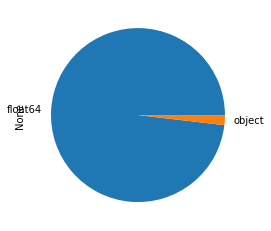

In [27]:
data.dtypes.value_counts().plot.pie()


In [32]:
head.isna()

,date(y-m-d),Argentine Peso,Australian Dollar,Bahraini Dinar,Botswana Pula,Brazilian Real,Bruneian Dollar,Bulgarian Lev,Canadian Dollar,Chilean Peso,...,Sri Lankan Rupee,Swedish Krona,Swiss Franc,Taiwan New Dollar,Thai Baht,Trinidadian Dollar,Turkish Lira,Emirati Dirham,British Pound,Venezuelan Bolivar
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

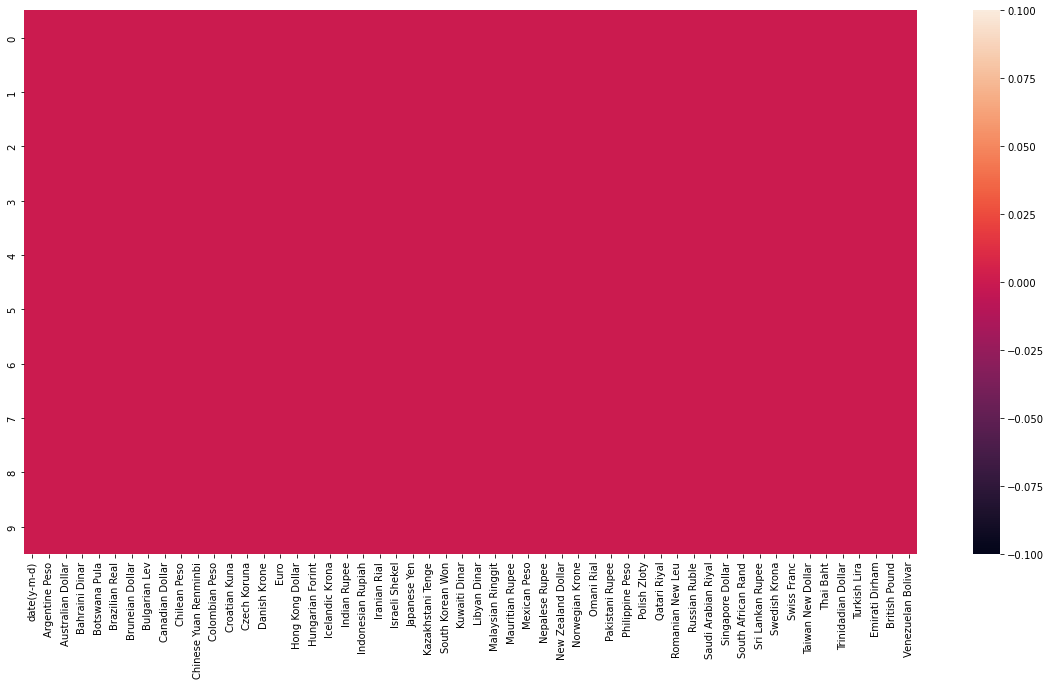

In [33]:
plt.figure(figsize=(20, 10))
sn.heatmap(head.isna(), cbar=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

LinAlgError: singular matrix

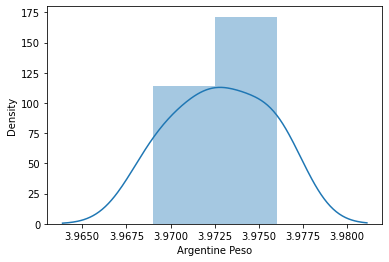

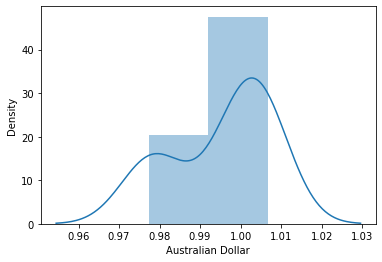

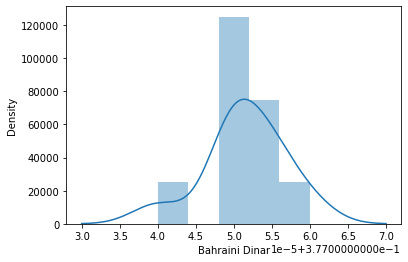

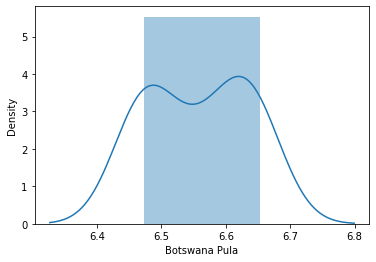

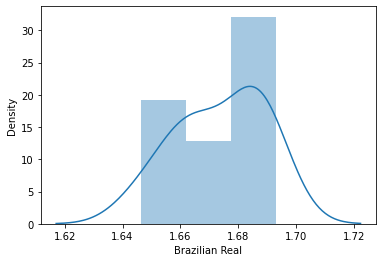

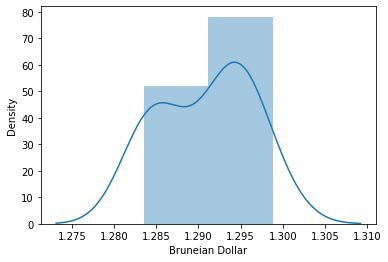

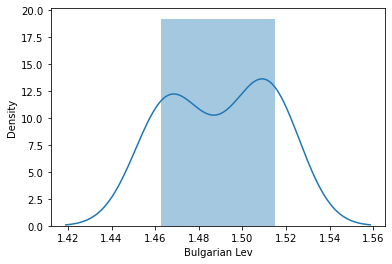

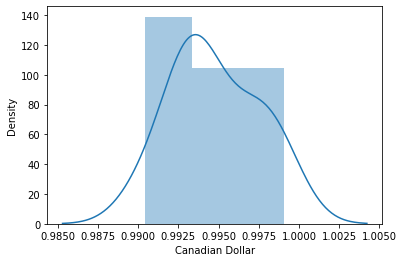

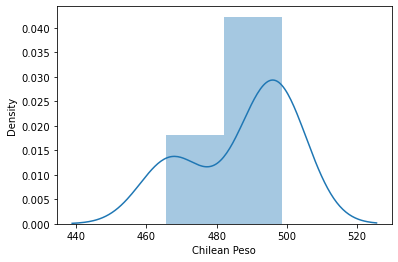

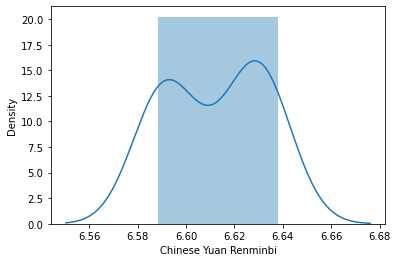

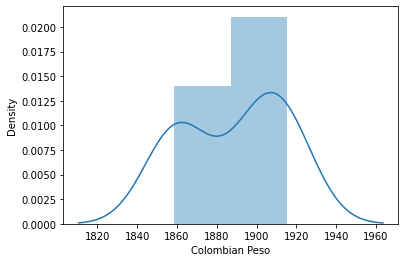

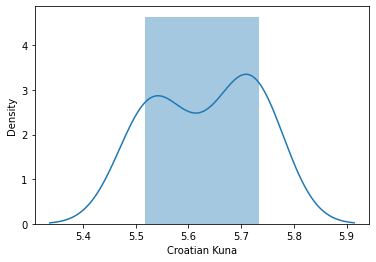

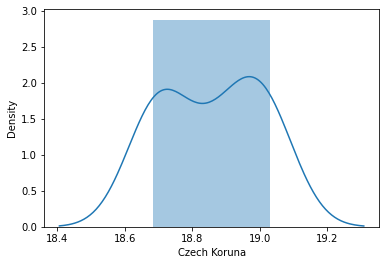

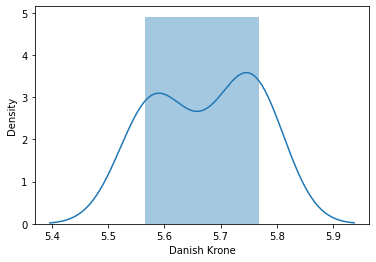

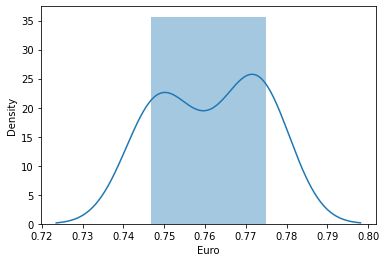

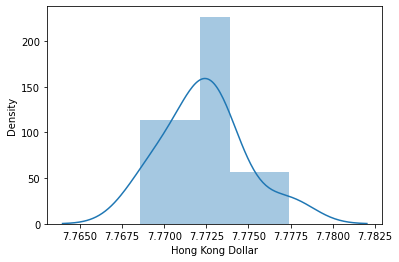

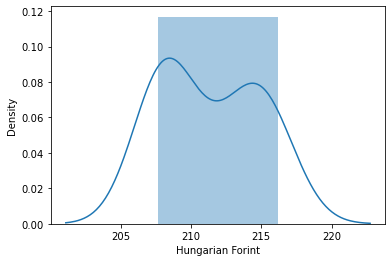

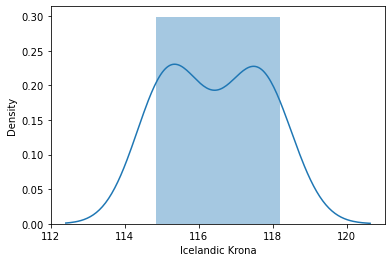

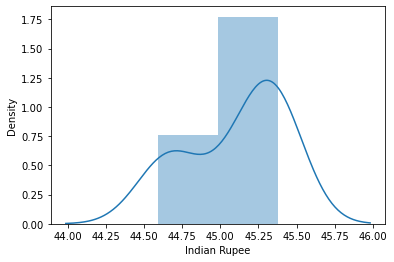

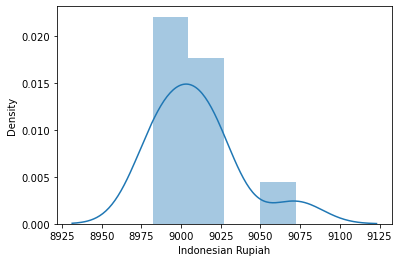

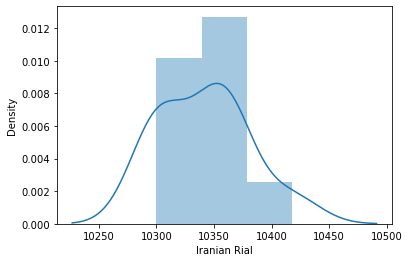

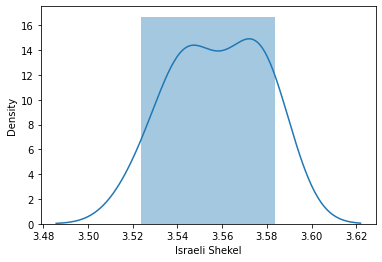

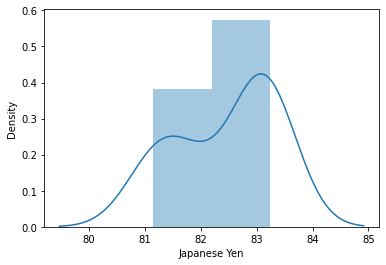

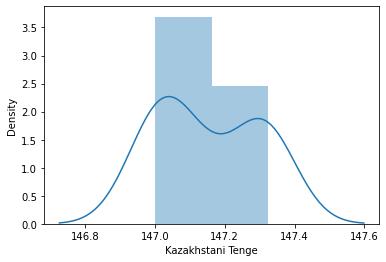

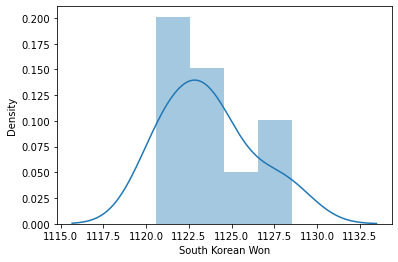

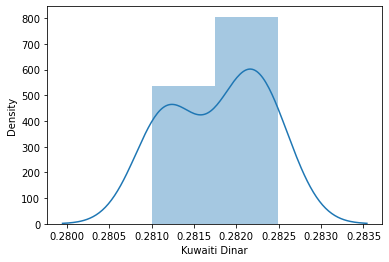

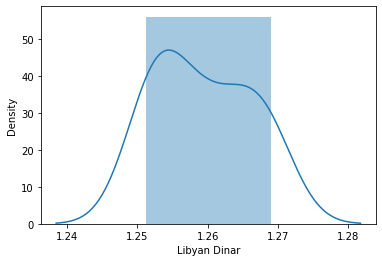

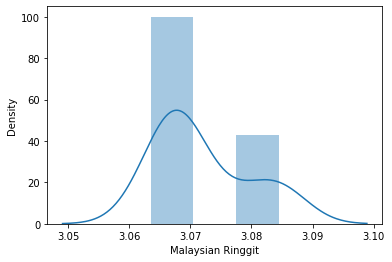

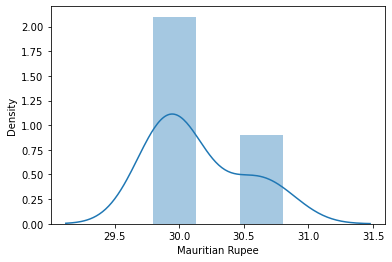

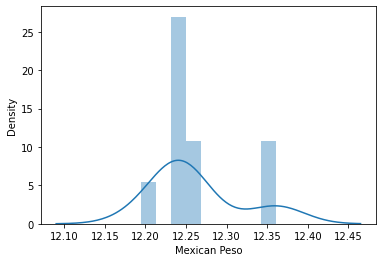

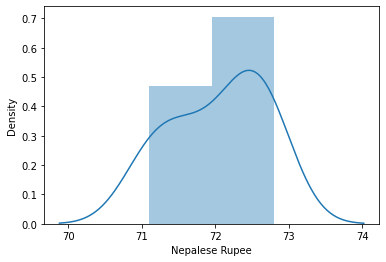

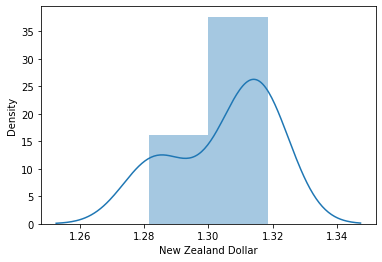

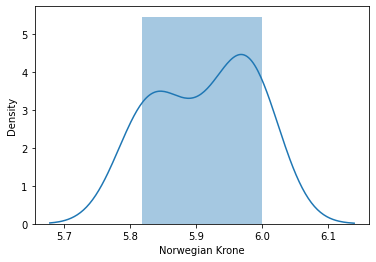

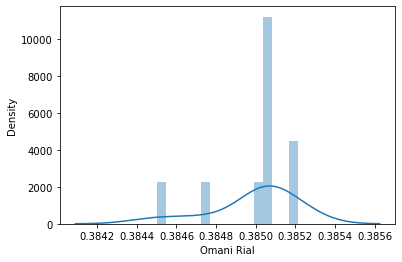

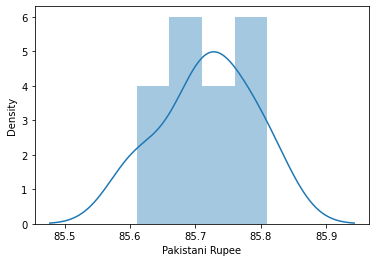

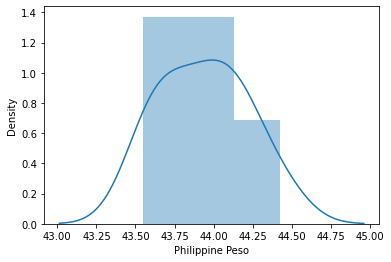

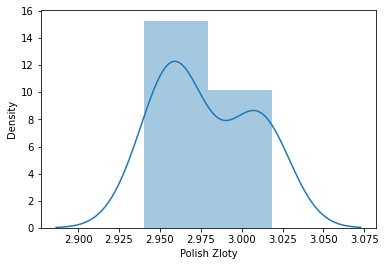

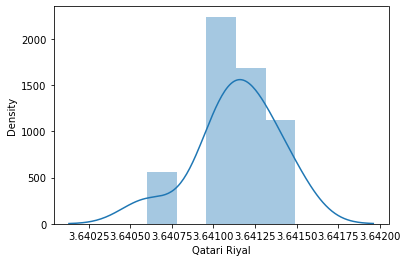

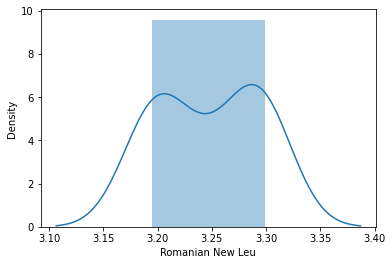

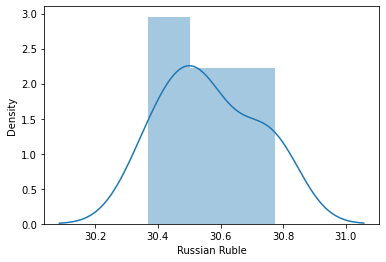

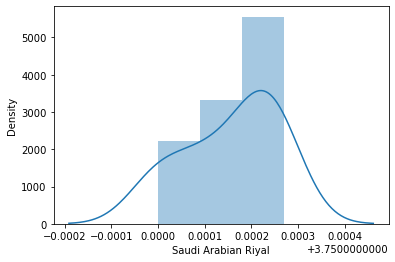

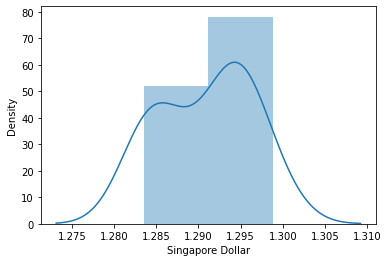

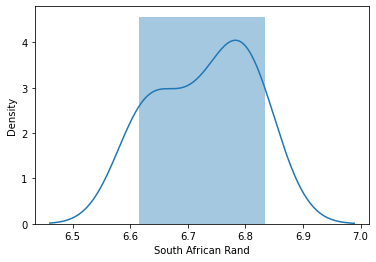

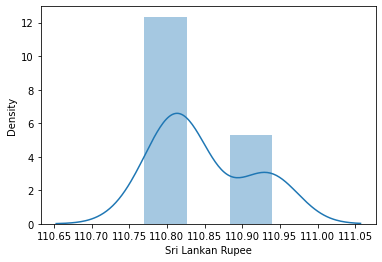

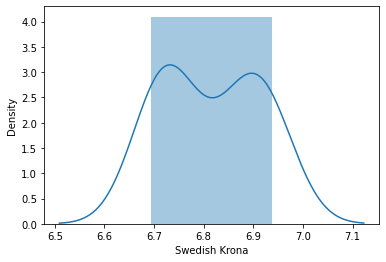

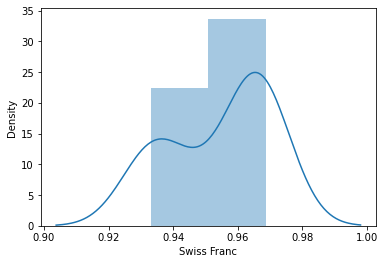

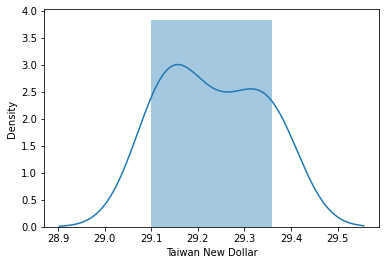

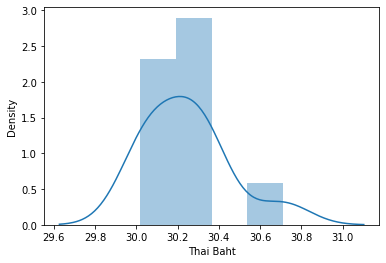

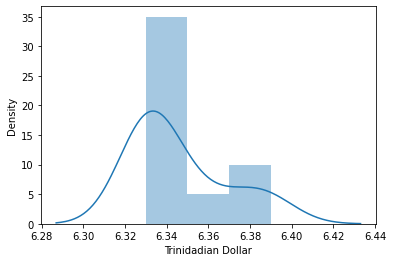

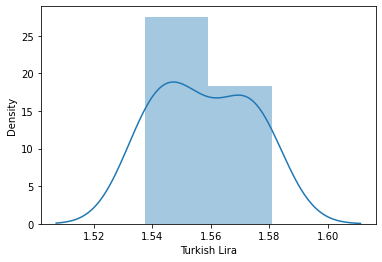

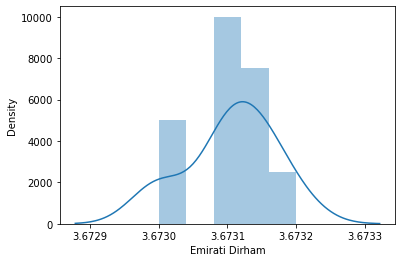

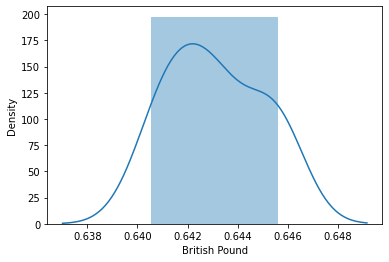

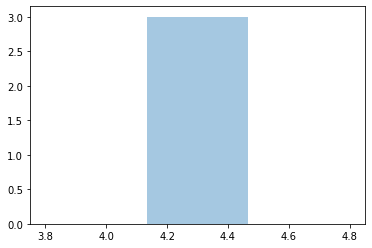

In [35]:
for col in df.select_dtypes('float'):
    plt.figure()
    sn.distplot(head[col])